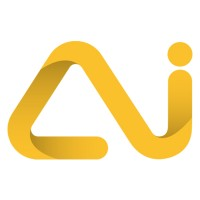

SHRIPAD C. DHOPATE
STUDENT OF ST. VINCENT PALLOTTI COLLEGE OF ENGINEERING AND TECHNOLOGY
MODEL TO PREDICT THE BODY TYPE OF CAR

In [1]:

import PIL.Image
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import cv2  
import os

In [2]:
img = image.load_img("D:\\projectimg\\CARS\\types\\test\\suv\\suv28.jpg")

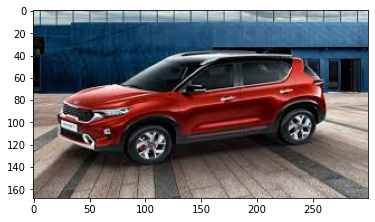

In [3]:
plt.imshow(img)
 

In [4]:
cv2.imread("D:\\projectimg\\CARS\\types\\test\\suv\\suv28.jpg").shape

(168, 300, 3)

In [5]:
train = ImageDataGenerator(rescale =1/255)
validation = ImageDataGenerator(rescale =1/255)
test = ImageDataGenerator(rescale =1/255)

In [24]:
train_dataset = train.flow_from_directory("D:\\projectimg\\CARS\\types\\train", 
                                         target_size= (150, 300),
                                         batch_size= 4,
                                         class_mode = 'categorical', shuffle=False)
validation_dataset = train.flow_from_directory("D:\\projectimg\\CARS\\types\\validation" , 
                                         target_size= (150, 300),
                                         batch_size= 4,
                                         class_mode = 'categorical',shuffle=False)
test_dataset = train.flow_from_directory("D:\\projectimg\\CARS\\types\\test" , 
                                         target_size= (150, 300),
                                         batch_size= 4,
                                         class_mode = 'categorical',shuffle=False)

Found 264 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 130 images belonging to 4 classes.


In [8]:
classes=train_dataset.class_indices
classes

{'mini_van': 0, 'pickup': 1, 'sedan': 2, 'suv': 3}

In [9]:
train_dataset.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [25]:
model  = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape=(150, 300, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                     
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    
                                    tf.keras.layers.Flatten(),
                                    #flatten is used to flatten the input
                                     
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                     
                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                
                                    ])

In [26]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [27]:
callbacks_list = [
                    keras.callbacks.ModelCheckpoint(filepath='vehical_color.model',monitor='val_loss', save_best_only=True, verbose=1),
                                                    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
                 ]

In [38]:
model_fit = model.fit(train_dataset,steps_per_epoch =6,epochs=50 ,validation_data = validation_dataset, callbacks = callbacks_list )

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 1.0236 - accuracy: 0.7083
Epoch 1: val_loss did not improve from 0.29709
6/6 [==============================] - 2s 287ms/step - loss: 1.0236 - accuracy: 0.7083 - val_loss: 0.5363 - val_accuracy: 0.8611
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.8750
Epoch 2: val_loss did not improve from 0.29709
6/6 [==============================] - 2s 282ms/step - loss: 0.2693 - accuracy: 0.8750 - val_loss: 0.5514 - val_accuracy: 0.8056
Epoch 3/50
6/6 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.29709
6/6 [==============================] - 2s 272ms/step - loss: 0.1100 - accuracy: 1.0000 - val_loss: 0.5451 - val_accuracy: 0.8333
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 0.1333 - accuracy: 0.9583
Epoch 4: val_loss did not improve from 0.29709
6/6 [==============================] - 2s 274ms/step - lo

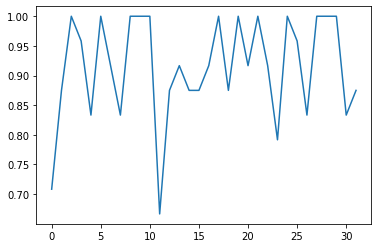

In [39]:
plt.plot(model_fit.history['accuracy'])
plt.show()

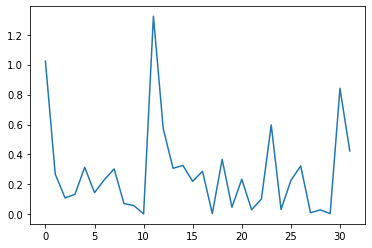

In [40]:
plt.plot(model_fit.history['loss'])
plt.show()

In [41]:
model.save('vehical_type.model')

INFO:tensorflow:Assets written to: vehical_type.model\assets


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 149, 16)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 147, 32)       4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 35, 64)      

In [43]:
from tensorflow.keras.models import load_model
model = load_model('vehical_type.model')

In [44]:
score = model.evaluate(train_dataset)
print('loss:', score[0])
print('accuracy:', score[1])

66/66 [==============================] - 1s 20ms/step - loss: 0.0874 - accuracy: 0.9697
loss: 0.08740992099046707
accuracy: 0.9696969985961914


In [45]:
score = model.evaluate(test_dataset)
print('loss:', score[0])
print('accuracy:', score[1])

33/33 [==============================] - 1s 19ms/step - loss: 0.0944 - accuracy: 0.9615
loss: 0.09444652497768402
accuracy: 0.9615384340286255


In [46]:
score = model.evaluate(validation_dataset)
print('loss:', score[0])
print('accuracy:', score[1])

18/18 [==============================] - 0s 19ms/step - loss: 0.1568 - accuracy: 0.9306
loss: 0.156814843416214
accuracy: 0.9305555820465088


Classification Report
              precision    recall  f1-score   support

    mini_van       1.00      0.83      0.91        30
      pickup       1.00      1.00      1.00        33
       sedan       1.00      1.00      1.00        21
         suv       0.90      1.00      0.95        46

    accuracy                           0.96       130
   macro avg       0.98      0.96      0.96       130
weighted avg       0.97      0.96      0.96       130



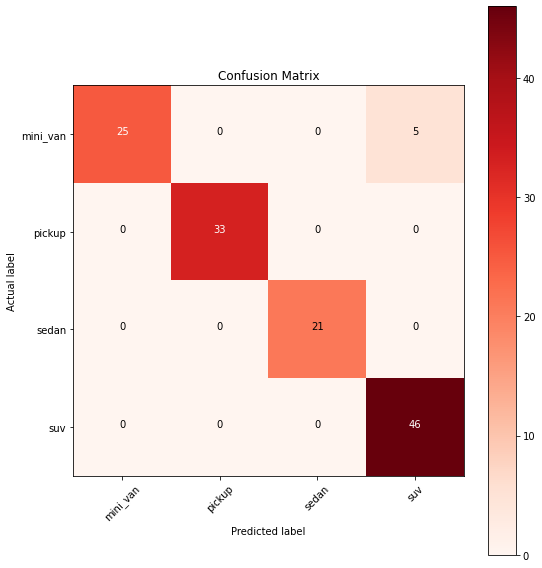

In [47]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

cm = confusion_matrix(test_dataset.classes, y_pred)
cmap=plt.cm.Reds
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

print('Classification Report')
print(classification_report(test_dataset.classes, y_pred, target_names=target_names))